# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.142, random_state=42)

In [5]:
print(len(X_train))

60060


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In jedem eintrag von X_train steht ein Vektor mit 728 Werten. diese entsprechende den Pixel Grauwerten eines 28x28 Bildes

In [19]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191., 255., 191.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
y_train[23]

'5'

5


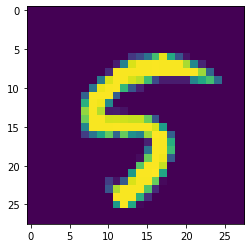

In [8]:
plt.imshow(X_train[23,:].reshape(28,28))
print(y_train[23])

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [9]:
%time
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#Predict the Numbers after train
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

Wall time: 0 ns


In [20]:
%%time
#Simple linear model
from sklearn.linear_model import SGDClassifier
slm= SGDClassifier(loss='log',max_iter=100)
y_pred_slm = slm.fit(X_train, y_train,).predict(X_test)

Wall time: 1min 35s


C:\Users\myguu\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [21]:
%%time
#Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)

Wall time: 46.9 s


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [23]:
#Naive_Bayes
print("Naive Bayes:")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_gnb))
print("F-Score:        ", f1_score(y_test,y_pred_gnb, average ='macro'))#macro:Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

#Simple linear Model
print("\nSimple linear Model:")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_slm))
print("F-Score:        ", f1_score(y_test,y_pred_slm, average ='macro'))
      
#Random forest Classifier
print("\nRandom forest Classifier:")
print("Accuracy Score: ", accuracy_score(y_test,y_pred_rfc))
print("F-Score:        ", f1_score(y_test,y_pred_rfc, average ='macro'))

Naive Bayes:
Accuracy Score:  0.5607645875251509
F-Score:         0.5093655510238113

Simple linear Model:
Accuracy Score:  0.8710261569416499
F-Score:         0.8674024257818738

Random forest Classifier:
Accuracy Score:  0.9665995975855131
F-Score:         0.9663888580711927


In [24]:
#get the 5
y_five = y_test=='5' 
y_pred_gnb_five = gnb.predict(X_test).astype(int)==5 
y_pred_slm_five = slm.predict(X_test).astype(int)==5
y_pred_rfc_five = rfc.predict(X_test).astype(int)==5

bayes_fpr, bayes_tpr, _ = roc_curve(y_five, y_pred_gnb_five)
linear_fpr, linear_tpr, _ = roc_curve(y_five, y_pred_slm_five)
randforest_fpr, randforest_tpr, _ = roc_curve(y_five, y_pred_rfc_five)


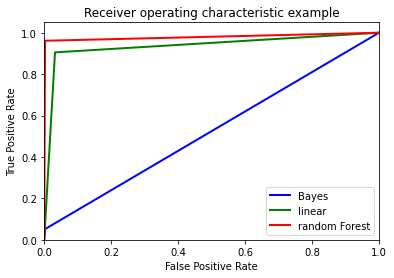

In [25]:
lw=2
plt.plot(bayes_fpr, bayes_tpr, color='blue',lw=lw, label='Bayes')
plt.plot(linear_fpr, linear_tpr, color='green',lw=lw, label='linear')
plt.plot(randforest_fpr, randforest_tpr, color='red',lw=lw,label='random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()